# ENTRAINNEMENT

## DATA PREPROCESSING

In [431]:
import pandas as pd
train_data = pd.read_csv("./DATA/train.csv")

In [433]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [435]:
# NB : EN L'ABSENCE D'ETUDE STATISTIQUE, J'AI DU FAIRE DES DEDUCTIONS A PARTIR DE CHATGPT POUR LES DONNEES MANQUANTES :)

priorites = { # ordre d'importance des titres à l'époque
    'Lady.': 1,
    'Sir.': 2,
    'theCountess.': 3,
    'Dona.': 4,
    'Don.': 5,
    'Jonkheer.': 6,
    'Capt.': 7,
    'Col.': 8,
    'Major.': 9,
    'Dr.': 10,
    'Rev.': 11,
    'Mrs.': 12,
    'Mr.': 13,
    'Miss.': 14,
    'Ms.': 15,
    'Master.': 16,
    'Mlle.': 17,
    'Mme.': 18
} # Classification basée sur chatgpt

age_sample = { # age approximatif en fonction des titres à l'époque
    'Lady.': 28,
    'Sir.': 40,
    'theCountess.': 35,
    'Dona.': 35,
    'Don.': 40,
    'Jonkheer.': 26,
    'Capt.': 40,
    'Col.': 50,
    'Major.': 44,
    'Dr.': 35,
    'Rev.': 50,
    'Mrs.': 38,
    'Mr.': 25,
    'Miss.': 22,
    'Ms.': 45,
    'Master.': 15,
    'Mlle.': 22,
    'Mme.': 38
} # Classification basée sur chatgpt

alphabet = { # nous seras utile pour la conversion des nom des cabines, juste pour les test :)
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9,
    'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17,
    'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25,
    'Z': 26
}


# Fonctions de pretraitement 

def extract_title(name): # elle permet d'extraire les titres des passagers à travers leurs la colonne "Name"
    start = name.index(',') + 1
    end = name.index('.') + 1
    title = name[start:end].replace(" ", "")
    return (priorites[title], title)

def apply_age(titre): # Certaine ligne de la colonne Age son vide, on les remplaces par des valeurs déduites des titres des passagers et leur signification à l'époque
    return age_sample[titre] if pd.isnull(titre) else titre
    
def apply_title_priority(name): # elle était dédiée aux tests :) , c'est la suite de extract_title() 
    return extract_title(name)[0]

def change_cabin_name(): # elle n'est plus utile, mais servait à remplacer les valeurs NaN de la colonne par "Z00"
    train_data['Cabin'].fillna('Z00', inplace=True)

def change_sex_to_binary(sex): # convertir le sex des passager en nombre binaire, 0 : homme, 1 : femme
    if sex == "male":
        return 0
    else:
        return 1

def split_transform_and_drop_cabin(df):
    # Pendant les tests :)
    
    #     def new_valueC(valeur):
    #         valeur = valeur.split(" ")[0] # on élimine les valeurs doubles ex. valeur = "BA2 BA2" devient valeur = "BA2"
    #         for v in valeur : # on retire les chaines vide : ""
    #             if v == "":
    #                 valeur.remove(v)
    #         return alphabet[valeur[0][0]] # la lettre obtenu est transformée en nombre selon le dictionnaire alphabet ci dessus

    #     def new_valueN(valeur):
    #         valeur = valeur.split(" ")
    #         for v in valeur :
    #             if v == "":
    #                 valeur.remove(v)
    #         if len(valeur[0])>1:
    #             return int(valeur[0][1:])
    #         else:
    #             return 0
    #
    
    # Après les tests :) 

    df.drop(columns=['Cabin'], inplace=True) # je préfère supprimer la colonne finalement
    
    return df

### Changer les sex en nombre binaire

In [436]:
train_data['Sex'] = train_data['Sex'].apply(change_sex_to_binary)

### substitution de la colonne Name par Title

In [437]:
#les noms n'étant aucune utilité, on se dmande si les titres n'ont pas joué lors des sauvetages
# Voulant utiliser un réseau de neurones, les titres sont convertis en niveau d'importance de 1 à 18
# selon le nombre de titres contenus dans le dataset
train_data['Name'] = train_data['Name'].apply(apply_title_priority)
train_data.rename(columns={'Name': 'Title'}, inplace=True) # on change le nom de la colonne Name en Title, 

### Mise à jour des ages nuls

In [439]:
train_data['Age'] = train_data['Title'].apply(apply_age)

### Suppression des colonnes PassengerId, Ticket et Embarked

In [440]:
train_data.drop(columns=['PassengerId'], inplace=True)
train_data.drop(columns=['Ticket'], inplace=True)
train_data.drop(columns=['Embarked'], inplace=True)

### Changement des valeur NaN de cabine en "Z00"

In [306]:
change_cabin_name()

### mutation de la colonne Cabine

In [441]:
train_data = split_transform_and_drop_cabin(train_data)

### Suppression des lignes ayant une colonne vide

In [442]:
train_data = train_data.dropna()

### Normalisation

In [443]:
#Pclass 
train_data['Pclass'] = (train_data['Pclass'] - train_data['Pclass'].min())/(train_data['Pclass'].max() - train_data['Pclass'].min())

#Title
train_data['Title'] = (train_data['Title'] - train_data['Title'].min())/(train_data['Title'].max() - train_data['Title'].min())

#Age
train_data['Age'] = (train_data['Age'] - train_data['Age'].min())/(train_data['Age'].max() - train_data['Age'].min())

#SibSp
train_data['SibSp'] = (train_data['SibSp'] - train_data['SibSp'].min())/(train_data['SibSp'].max() - train_data['SibSp'].min())

#Parch
train_data['Parch'] = (train_data['Parch'] - train_data['Parch'].min())/(train_data['Parch'].max() - train_data['Parch'].min())

#Fare
train_data['Fare'] = (train_data['Fare'] - train_data['Fare'].min())/(train_data['Fare'].max() - train_data['Fare'].min())

# #CabinC
# train_data['CabinC'] = (train_data['CabinC'] - train_data['CabinC'].min())/(train_data['CabinC'].max() - train_data['CabinC'].min())

# #CabinN
# train_data['CabinN'] = (train_data['CabinN'] - train_data['CabinN'].min())/(train_data['CabinN'].max() - train_data['CabinN'].min())


### Résultat

In [489]:
train_data

,Survived,Pclass,Title,Sex,Age,SibSp,Parch,Fare
0,0,1.0,0.705882,0,0.705882,0.125,0.000000,0.014151
1,1,0.0,0.647059,1,0.647059,0.125,0.000000,0.139136
2,1,1.0,0.764706,1,0.764706,0.000,0.000000,0.015469
3,1,0.0,0.647059,1,0.647059,0.125,0.000000,0.103644
4,0,1.0,0.705882,0,0.705882,0.000,0.000000,0.015713
...,...,...,...,...,...,...,...,...
886,0,0.5,0.588235,0,0.588235,0.000,0.000000,0.025374
887,1,0.0,0.764706,1,0.764706,0.000,0.000000,0.058556
888,0,1.0,0.764706,1,0.764706,0.125,0.333333,0.045771
889,1,0.0,0.705882,0,0.705882,0.000,0.000000,0.058556


## MODELISATION

In [445]:
import matplotlib.pyplot as plt
# from sklearn.datasets import make_blobs
import numpy as np

In [446]:
# colons = ['Pclass', 'Title', 'Sex' , 'Age', 'SibSp' , 'Parch' ,'Fare', 'CabinC', 'CabinN']
colons = ['Pclass', 'Title', 'Sex' , 'Age', 'SibSp' , 'Parch' ,'Fare']

X = [train_data[colon].values.reshape(-1, 1) for colon in colons] # Convertir chaque colonne en un tableau NumPy

X = np.concatenate(X, axis=1) # Concaténer les tableaux NumPy ensemble

y = train_data['Survived'].values.reshape(-1, 1)

In [447]:
print('dimensions de X ', X.shape)
print('dimensions de y ', y.shape)

dimensions de X  (891, 7)
dimensions de y  (891, 1)


### Initialisation

In [448]:
def initialisation(X):
    w = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (w, b)

In [449]:
W, b = initialisation(X)

In [450]:
b

array([0.76657892])

### Model

In [451]:
def model(X, W, b):
    z = X.dot(W) + b
    A = 1/(1+np.exp(-z))
    return A

In [452]:
A = model(X, W, b)

In [453]:
A

array([[0.45244731],
       [0.27940343],
       [0.10035126],
       [0.27537712],
       [0.42522535],
       [0.4253356 ],
       [0.69190156],
       [0.52113222],
       [0.10856167],
       [0.17888179],
       [0.11595731],
       [0.24772749],
       [0.42522535],
       [0.51005642],
       [0.1003442 ],
       [0.1609818 ],
       [0.55105327],
       [0.55850607],
       [0.11221945],
       [0.10050495],
       [0.56204415],
       [0.55850607],
       [0.10036165],
       [0.68803499],
       [0.1414207 ],
       [0.13599023],
       [0.42500262],
       [0.81129164],
       [0.10034669],
       [0.42518372],
       [0.6883149 ],
       [0.29644012],
       [0.10033381],
       [0.55782497],
       [0.72191109],
       [0.71517074],
       [0.42500376],
       [0.42522535],
       [0.12354417],
       [0.11123294],
       [0.11128464],
       [0.17741467],
       [0.42518372],
       [0.19280097],
       [0.10034669],
       [0.42522535],
       [0.45470611],
       [0.100

### Fonction coût

In [454]:
def log_lost(A, y):
    epsilon = 1.0e-15
    return 1/len(y) * np.sum(-y*np.log(A + epsilon) - (1-y)*np.log(1 - A + epsilon))

In [455]:
log_lost(A, y)

0.9219330352485937

### Fonction gradients

In [456]:
def gradients(X, A, y):
    dw = 1/len(y) * np.dot(X.T, (A-y))
    db = 1/len(y) * np.sum(A-y)
    return (dw, db)

In [457]:
dw, db = gradients(X, A, y)

### Fonction update

In [458]:
def update(W, b, dw, db, learning_rate):
    b = b - learning_rate*db
    W = W - learning_rate*dw
    return (W, b)
    

## ALGORITHME

In [471]:
from sklearn.metrics import accuracy_score
from tqdm import tqdm # Une bibliothèque chouette pour les barres de progession :) :)

In [466]:
def predict(X, W, b, seuil=0.55):
    A = model(X, W, b)
    return A >= seuil

In [483]:
def neurone(X, y, learning_rate = 0.01, n_iter = 20000):
    #Initialisation
    W, b = initialisation(X)
    
    #boucle
    Loss = []
    for i in tqdm(range(n_iter)):
        A = model(X, W, b)
        Loss.append(log_lost(A, y))
        dw, db = gradients(X, A, y)
        W, b = update(W, b, dw, db, learning_rate)
        
    
    y_pred = predict(X, W, b)
    print(accuracy_score(y, y_pred))
    plt.plot(Loss)
    plt.show
    
    return (W, b)

100%|██████████████████████████████████████████████████████████████████████████| 20000/20000 [00:02<00:00, 6694.50it/s]


0.792368125701459


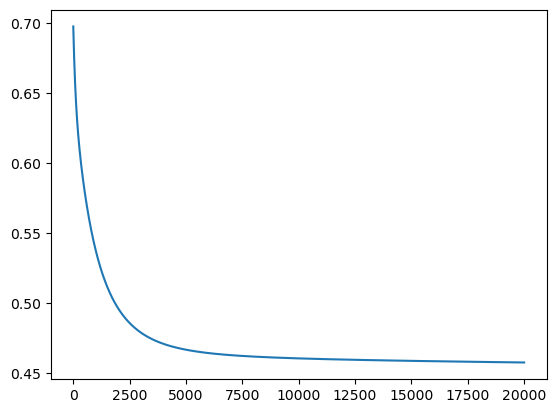

In [484]:
Wn, bn = neurone(X, y)

# TEST

### Data preprocessing

In [510]:
test_data = pd.read_csv("./DATA/test.csv")
Id = test_data['PassengerId']
priorites = {
    'Lady.': 1,
    'Sir.': 2,
    'theCountess.': 3,
    'Dona.': 4,
    'Don.': 5,
    'Jonkheer.': 6,
    'Capt.': 7,
    'Col.': 8,
    'Major.': 9,
    'Dr.': 10,
    'Rev.': 11,
    'Mrs.': 12,
    'Mr.': 13,
    'Miss.': 14,
    'Ms.': 15,
    'Master.': 16,
    'Mlle.': 17,
    'Mme.': 18
} # Classification basée sur chatgpt

age_sample = {
    'Lady.': 28,
    'Sir.': 40,
    'theCountess.': 35,
    'Dona.': 35,
    'Don.': 40,
    'Jonkheer.': 26,
    'Capt.': 40,
    'Col.': 50,
    'Major.': 44,
    'Dr.': 35,
    'Rev.': 50,
    'Mrs.': 38,
    'Mr.': 25,
    'Miss.': 22,
    'Ms.': 45,
    'Master.': 15,
    'Mlle.': 22,
    'Mme.': 38
} # Classification basée sur chatgpt
alphabet = {
    'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9,
    'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17,
    'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25,
    'Z': 26
}


def extract_title(name):
    start = name.index(',') + 1
    end = name.index('.') + 1
    title = name[start:end].replace(" ", "")
    return (priorites[title], title)

def apply_age(titre):
    return age_sample[titre] if pd.isnull(titre) else titre
    
def apply_title_priority(name):
    return extract_title(name)[0]

def t_change_cabin_name():
    test_data['Cabin'].fillna('Z00', inplace=True)
  
    

def change_sex_to_binary(sex):
    if sex == "male":
        return 0
    else:
        return 1

def split_transform_and_drop_cabin(df):
    def new_valueC(valeur):
        valeur = valeur.split(" ")[0] # on élimine les valeurs doubles ex. valeur = "BA2 BA2" devient valeur = "BA2"
        for v in valeur : # on retire les chaines vide : ""
            if v == "":
                valeur.remove(v)
        return alphabet[valeur[0][0]] # la lettre obtenu est transformée en nombre selon le dictionnaire alphabet ci dessus
    
    def new_valueN(valeur):
        valeur = valeur.split(" ")
        for v in valeur :
            if v == "":
                valeur.remove(v)
        if len(valeur[0])>1:
            return int(valeur[0][1:])
        else:
            return 0
    
        #df = df.assign(CabinC=lambda x: x['Cabin'].apply(lambda valeur: new_valueC(valeur)))
        #df = df.assign(CabinN=lambda x: x['Cabin'].apply(lambda valeur: new_valueN(valeur)))
    
    df.drop(columns=['Cabin'], inplace=True)
    
    return df


test_data['Sex'] = test_data['Sex'].apply(change_sex_to_binary)

test_data['Name'] = test_data['Name'].apply(apply_title_priority)
test_data.rename(columns={'Name': 'Title'}, inplace=True)

test_data['Age'] = test_data['Title'].apply(apply_age)

test_data.drop(columns=['PassengerId'], inplace=True)
test_data.drop(columns=['Ticket'], inplace=True)
test_data.drop(columns=['Embarked'], inplace=True)

t_change_cabin_name()

test_data = split_transform_and_drop_cabin(test_data)

test_data.fillna(0, inplace=True)

#Pclass 
test_data['Pclass'] = (test_data['Pclass'] - test_data['Pclass'].min())/(test_data['Pclass'].max() - test_data['Pclass'].min())

#Title
test_data['Title'] = (test_data['Title'] - test_data['Title'].min())/(test_data['Title'].max() - test_data['Title'].min())

#Age
test_data['Age'] = (test_data['Age'] - test_data['Age'].min())/(test_data['Age'].max() - test_data['Age'].min())

#SibSp
test_data['SibSp'] = (test_data['SibSp'] - test_data['SibSp'].min())/(test_data['SibSp'].max() - test_data['SibSp'].min())

#Parch
test_data['Parch'] = (test_data['Parch'] - test_data['Parch'].min())/(test_data['Parch'].max() - test_data['Parch'].min())

#Fare
test_data['Fare'] = (test_data['Fare'] - test_data['Fare'].min())/(test_data['Fare'].max() - test_data['Fare'].min())

test_data

,Pclass,Title,Sex,Age,SibSp,Parch,Fare
0,1.0,0.750000,0,0.750000,0.000,0.000000,0.015282
1,1.0,0.666667,1,0.666667,0.125,0.000000,0.013663
2,0.5,0.750000,0,0.750000,0.000,0.000000,0.018909
3,1.0,0.750000,0,0.750000,0.000,0.000000,0.016908
4,1.0,0.666667,1,0.666667,0.125,0.111111,0.023984
...,...,...,...,...,...,...,...
413,1.0,0.750000,0,0.750000,0.000,0.000000,0.015713
414,0.0,0.000000,1,0.000000,0.000,0.000000,0.212559
415,1.0,0.750000,0,0.750000,0.000,0.000000,0.014151
416,1.0,0.750000,0,0.750000,0.000,0.000000,0.015713


### Prediction

In [523]:
# colons = ['Pclass', 'Title', 'Sex' , 'Age', 'SibSp' , 'Parch' ,'Fare', 'CabinC', 'CabinN']
colons = ['Pclass', 'Title', 'Sex' , 'Age', 'SibSp' , 'Parch' ,'Fare']

X = [test_data[colon].values.reshape(-1, 1) for colon in colons] # Convertir chaque colonne en un tableau NumPy

X = np.concatenate(X, axis=1) # Concaténer les tableaux NumPy ensemble


print('dimensions de X ', X.shape)

result = predict(X, Wn, bn)
result.shape
a = result.tolist() # liste des résultats obtenus
b = Id.tolist() # liste des Id des passagers du dataset de test : test_data

dimensions de X  (418, 7)


### Importation des résultats des prédictions dans un fichier .csv

In [542]:
import csv
l_final = []
for elm, element in zip(b, a):
    v = []
    
    v.append(elm)
    
    if element[0]:
        v.append('1')
    else :
        v.append('0')
        
    l_final.append(v)

nom_fichier = "result.csv"

with open(nom_fichier, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    for row in l_final:
        writer.writerow(row)